In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Load dataset
data = fetch_openml(name="UCI-student-performance-mat", version=1, as_frame=True)
df = data.frame

X = df[features]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We choose 3 clusters for demonstration
df['cluster'] = kmeans.fit_predict(X_scaled)

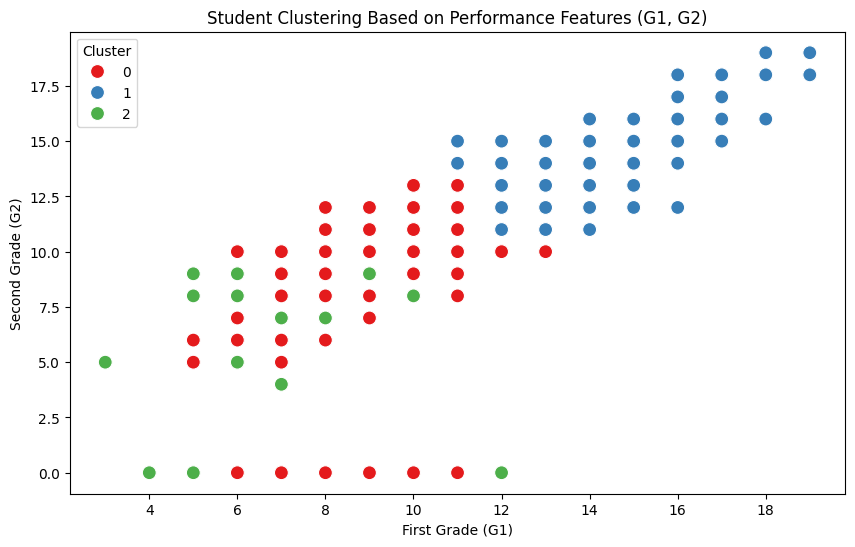

In [25]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['G1'], y=df['G2'], hue=df['cluster'], palette='Set1', s=100)
plt.title('Student Clustering Based on Performance Features (G1, G2)')
plt.xlabel('First Grade (G1)')
plt.ylabel('Second Grade (G2)')
plt.legend(title="Cluster")
plt.show()

In [26]:
# Cluster analysis
cluster_counts = df['cluster'].value_counts()
print(f"Cluster Distribution:\n{cluster_counts}")

# Cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(f"\nCluster Centers:\n{centers}")

Cluster Distribution:
cluster
0    199
1    154
2     42
Name: count, dtype: int64

Cluster Centers:
[[ 2.07537688  0.15075377  6.98994975  9.11055276  8.91959799]
 [ 2.13636364  0.08441558  4.29220779 14.30519481 14.21428571]
 [ 1.47619048  2.11904762  4.83333333  6.97619048  6.38095238]]
